In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='darkgrid', context='talk')

import warnings
warnings.filterwarnings('ignore')

from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error
from numpy import sqrt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [63]:
import io
df = pd.read_csv(io.BytesIO(uploaded['final_data.csv']))

In [64]:
df

,date,payment,site,item_name,brand_name,group0,group1,category,gender,age,color,size,total_revenue
0,2019-06-01,COD,tint-store.cz,Adidas Originals bucket hat hut,adidas Originals,Apparel,Caps,lifestyle,unisex,adults,Black,OSFM,20.789147
1,2019-06-01,COD,11teamsports.cz,LS GARDIEN JSY,Nike,Apparel,T-Shirts,football,men,adults,Green,XXL,34.403101
2,2019-06-01,COD,top4running.cz,W NK RUN TOP SS,Nike,Apparel,T-Shirts,running,women,adults,White,XS,10.378682
3,2019-06-01,PAYPAL,top4fitness.de,NK ELMNTL BKPK,Nike,Equipment,Backpacks,football,unisex,adults,Green,ks,8.245429
4,2019-06-01,COD,top4running.ro,NIKE ZOOM RIVAL S 9,Nike,Footwear,Running shoes,running,unisex,adults,Black,42,106.351023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128519,2022-01-14,COD,11teamsports.cz,Dopravné,- žádný výrobce -,Other,Running shoes,football,men,adults,Black,M,1.889922
2128520,2022-01-14,COD,top4running.hu,Nike Womens Kiger Vest 40,Nike,Equipment,Backpacks,running,women,adults,Silver,XS/S,93.929085
2128521,2022-01-14,COD,11teamsports.cz,Platba,- žádný výrobce -,Other,Running shoes,football,men,adults,Black,M,0.929070
2128522,2022-01-14,COD,11teamsports.cz,adidas Mundial Goal IN,adidas,Footwear,Football shoes,football,men,adults,Black,"37,3",94.400775


In [65]:
df = pd.DataFrame(df.groupby('date')['total_revenue'].sum())

In [66]:
df.reset_index(level=0, inplace=True)

In [67]:
df = df.rename(columns={'date':'ds', 'total_revenue':'y'})

In [68]:
df['ds'] = pd.to_datetime(df['ds'])

In [69]:
df.shape

(958, 2)

In [70]:
df

,ds,y
0,2019-06-01,4121.074856
1,2019-06-02,78.764024
2,2019-06-03,1354.000653
3,2019-06-04,70505.743012
4,2019-06-05,66236.436269
...,...,...
953,2022-01-10,109472.937561
954,2022-01-11,112798.634218
955,2022-01-12,102618.516796
956,2022-01-13,99848.201651


In [71]:
train_df = df[:866]
test_df = df[866:]

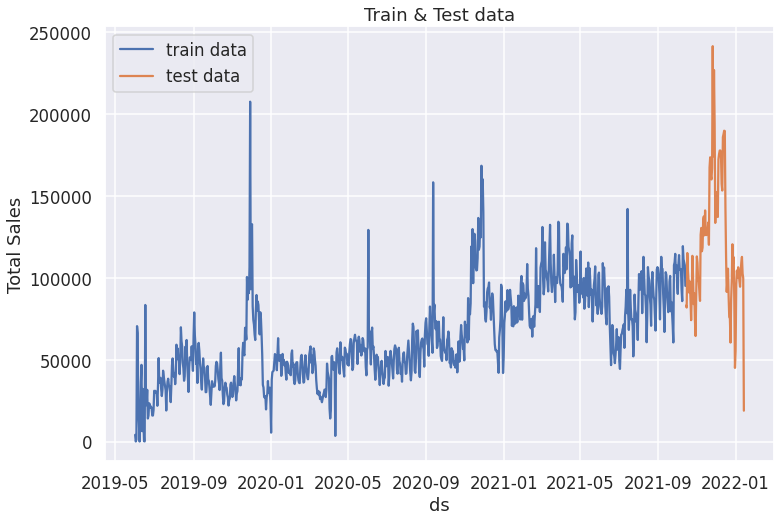

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='ds', y='y', data=train_df, label='train data')
sns.lineplot(x='ds', y='y', data=test_df, label='test data')

ax.legend(loc='upper left')
ax.set(title="Train & Test data", ylabel='Total Sales')
plt.show()

In [73]:
# Trainin the model

model = Prophet(seasonality_mode='multiplicative')
model.add_seasonality(name='monthly', period=30, fourier_order=10)
model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = model.make_future_dataframe(periods=90, freq='d', include_history=False)
forecast = model.predict(future)
forecast[['ds','yhat']]

,ds,yhat
0,2021-10-15,76254.989054
1,2021-10-16,68761.493888
2,2021-10-17,89093.151563
3,2021-10-18,94470.165235
4,2021-10-19,86831.611763
...,...,...
85,2022-01-08,97435.735585
86,2022-01-09,122473.809428
87,2022-01-10,128949.745812
88,2022-01-11,122691.221113


In [15]:
!pip install prophet


     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640015 sha256=2979ddf4d9a48621d3b6d1f1f375176793178430db05d1aee0519fb6849a4b27
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


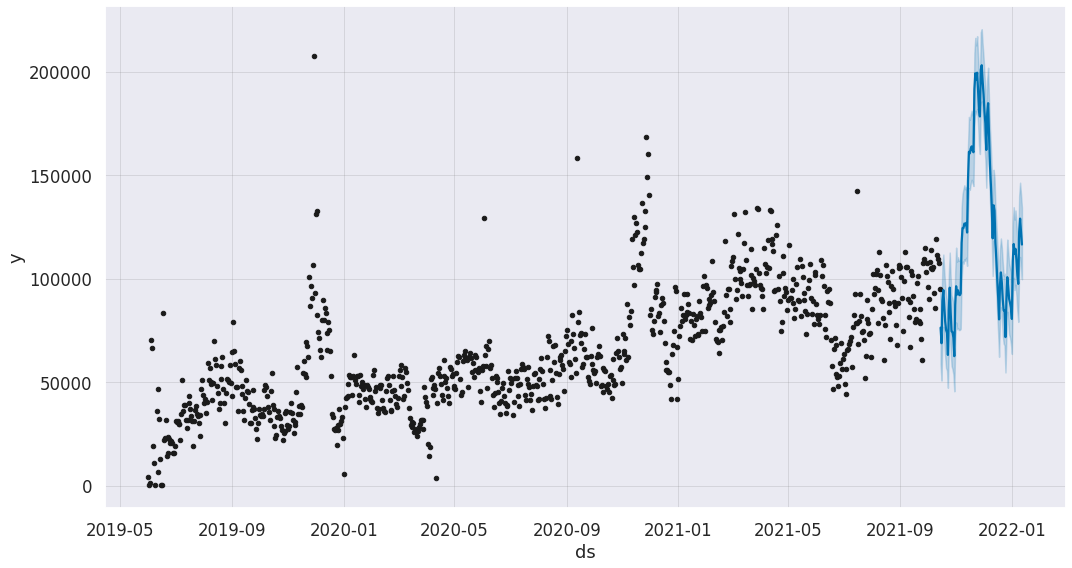

In [48]:
# ploting the forecast

f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)

fig=model.plot(forecast, ax=ax)

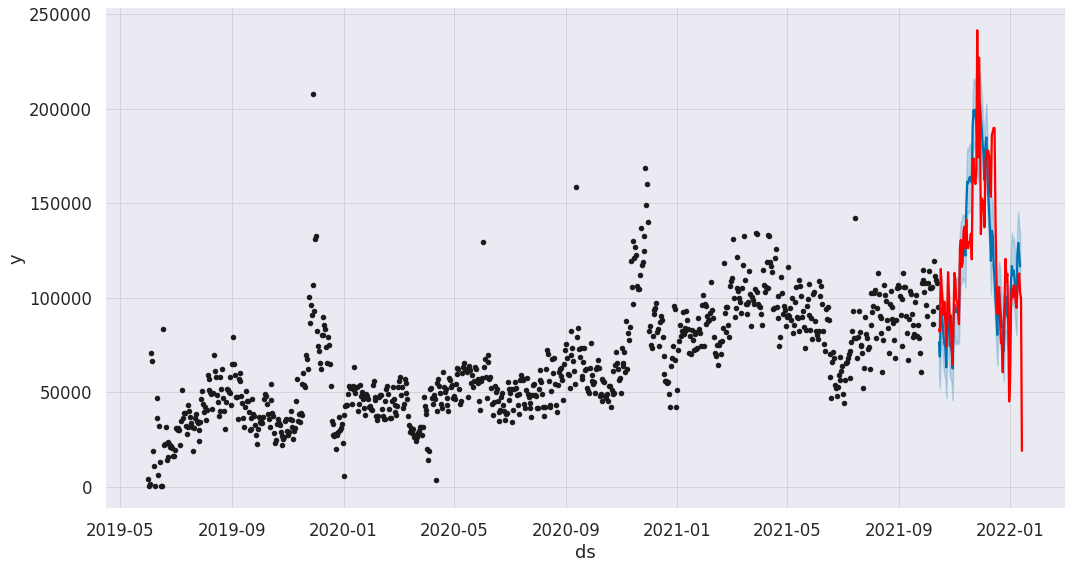

In [75]:
# comparing Forecast vs Actual

f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)


fig=model.plot(forecast, ax=ax)
ax.plot(test_df.ds, test_df.y, color='red')



Text(0.5, 1.0, 'Prediction vs Observed')

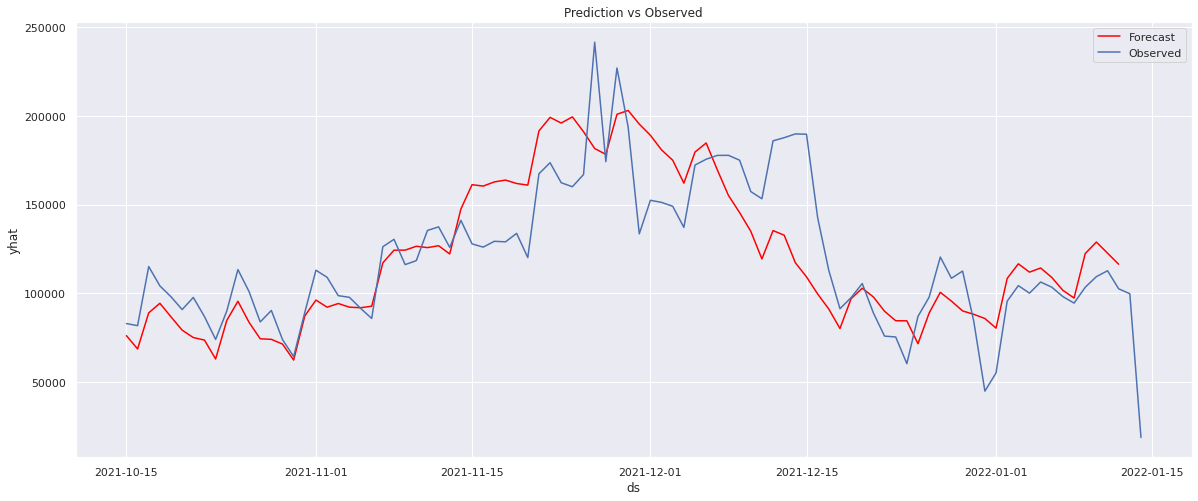

In [85]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(forecast.ds, forecast.yhat, color='red', label='Forecast')
sns.lineplot(test_df.ds, test_df.y, label='Observed').set_title("Prediction vs Observed")

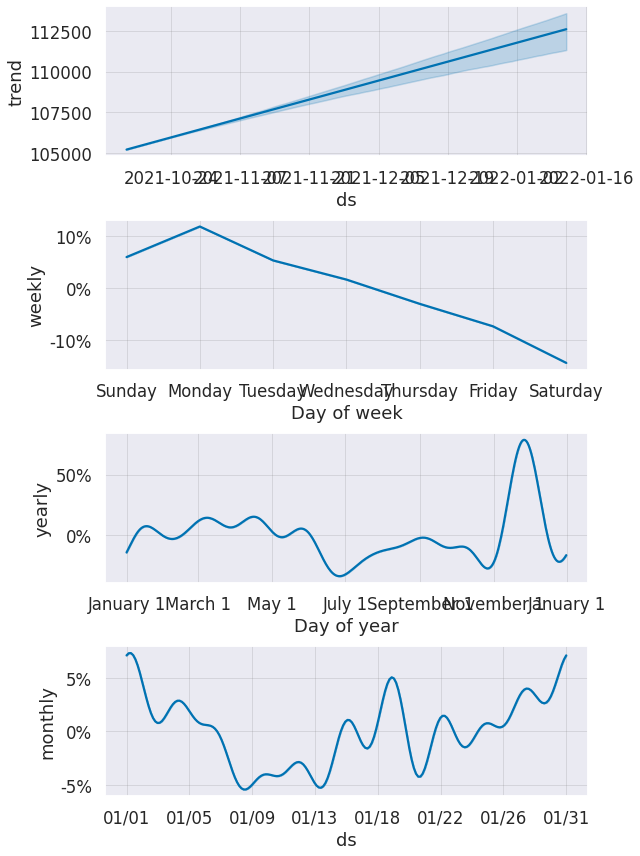

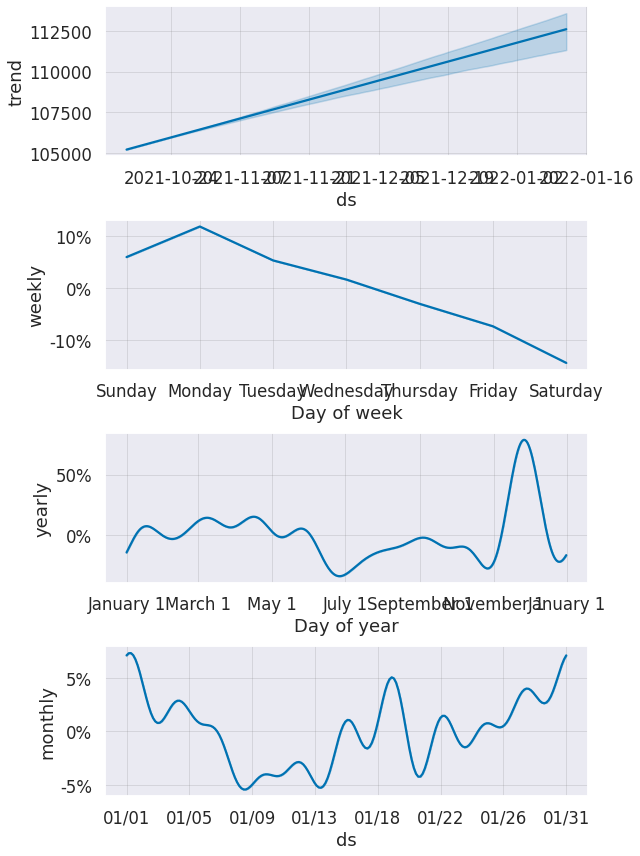

In [18]:
# plotting model components

model.plot_components(forecast)

In [87]:
from sklearn.metrics import mean_squared_error
from math import sqrt

error = sqrt(mean_squared_error(test_df.y[:-2], forecast.yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 25102.089


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


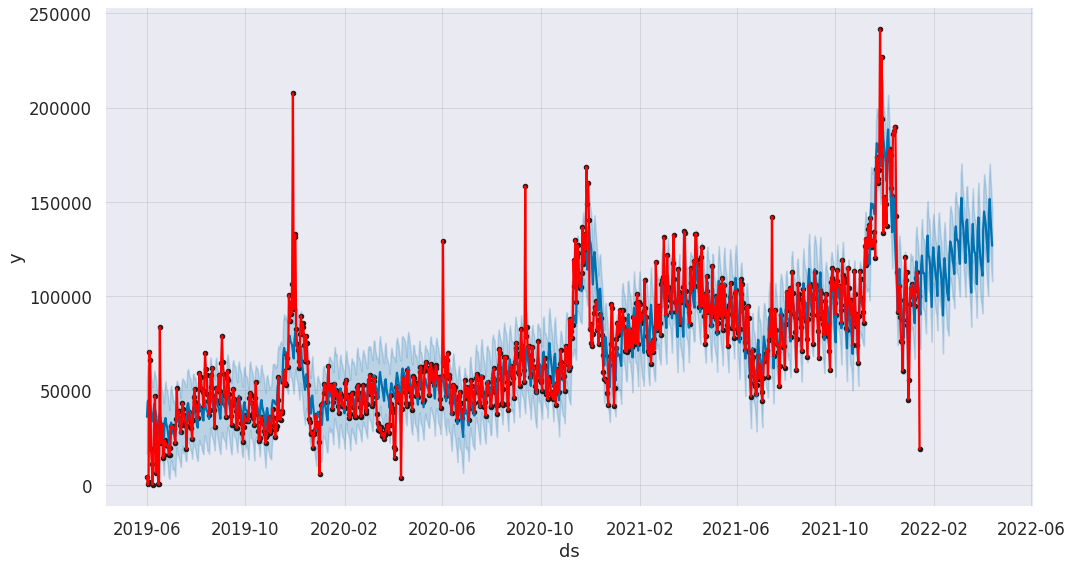

In [55]:
# Now fitting the whole data set

model = Prophet(seasonality_mode='multiplicative')
model.add_seasonality(name='monthly', period=30, fourier_order=10)
model.fit(df)


future = model.make_future_dataframe(periods=90, freq='d', include_history=True)
forecast = model.predict(future)
forecast[['ds','yhat']]



# comparing Forecast to Actual

f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)

fig=model.plot(forecast, ax=ax)
ax.plot(df.ds, df.y, color='red')


In [57]:
three_months_prediction = pd.DataFrame(forecast[['ds','yhat']][-90:])
three_months_prediction.head()

,ds,yhat
958,2022-01-15,90212.660511
959,2022-01-16,116017.961709
960,2022-01-17,121475.104000
961,2022-01-18,112373.899016
962,2022-01-19,112382.189233


In [58]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Cross Validation
df_cv=cross_validation(model, horizon='90 days', initial='90', period='90 days')

mape=mean_absolute_percentage_error(df_cv.y, df_cv.yhat)
print('MAPE: ', mape)

INFO:fbprophet:Making 10 forecasts with cutoffs between 2019-07-29 00:00:00 and 2021-10-16 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

MAPE:  87.11203749133402


In [59]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-07-30,33683.298855,25102.255418,40937.169839,50786.674450,2019-07-29
1,2019-07-31,28199.424355,20560.454181,36170.335584,43602.007603,2019-07-29
2,2019-08-01,19786.669087,11822.888284,27845.216766,39667.037609,2019-07-29
3,2019-08-02,9633.797645,1204.559010,17787.884574,41847.495861,2019-07-29
4,2019-08-03,-2083.807065,-9854.195740,6134.964372,35072.733584,2019-07-29


In [60]:
### Performance Metrics
from fbprophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)
df_perf

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,9.219952e+08,30364.373444,21867.176504,0.389804,0.319953,0.366667
1,10 days,1.235467e+09,35149.204155,24877.416530,0.447100,0.366993,0.322222
2,11 days,1.636093e+09,40448.647150,27637.434937,0.497892,0.379359,0.300000
3,12 days,2.120409e+09,46047.897936,30543.667670,0.560904,0.384185,0.266667
4,13 days,2.751667e+09,52456.332590,33499.844898,0.620322,0.384814,0.233333
...,...,...,...,...,...,...,...
77,86 days,2.095052e+09,45771.738827,35372.744766,0.638616,0.459162,0.322222
78,87 days,2.188020e+09,46776.280343,35687.176084,0.665723,0.445747,0.322222
79,88 days,2.231789e+09,47241.812687,35828.363479,0.690280,0.428691,0.333333
80,89 days,2.351942e+09,48496.824898,36212.757409,0.741715,0.432090,0.333333


Text(0.5, 1.0, ' Forecast Vs Actual')

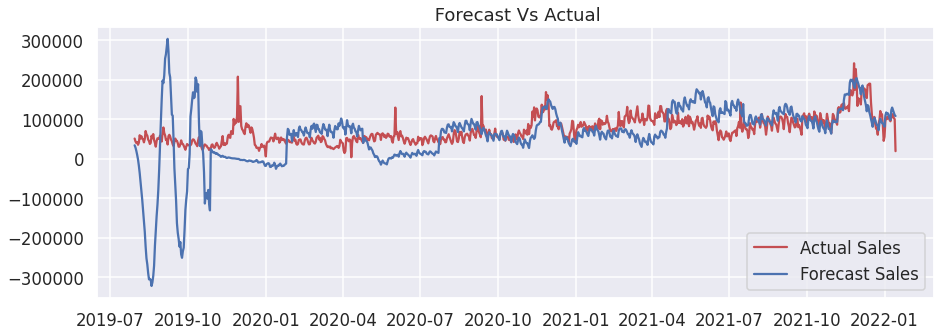

In [61]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_cv['ds'], df_cv['y'], color='r', label='Actual Sales')
ax.plot(df_cv['ds'], df_cv['yhat'], color='b', label='Forecast Sales')
plt.legend()



plt.title(' Forecast Vs Actual')

In [26]:
# Hyperparameter tuning

from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [27]:
import itertools
param_grid = {'seasonality_mode':('multiplicative','additive'),  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'n_changepoints' : [3, 6, 9, 12, 15, 18, 21, 24, 25, 30]}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    cutoffs=pd.to_datetime(['2020-03-03','2020-04-28'])
    m = Prophet(**params).fit(train_df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

#https://facebook.github.io/prophet/docs/diagnostics.html

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8d9ee119d0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8d9ba7bb90>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8da428d950>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f8d9e3d3d50>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in par

KeyboardInterrupt: ignored

In [ ]:
tuning_results.sort_values('rmse')

In [ ]:
final_model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.5, seasonality_prior_scale=0.01, n_changepoints=3)
final_model.add_seasonality(name='monthly', period=30, fourier_order=10)
final_model.fit(train_df)

In [ ]:
future = final_model.make_future_dataframe(periods=90, freq='d', include_history=False)
final_forecast = final_model.predict(future)
final_forecast[['ds','yhat']]

In [ ]:
# comparing Forecast (based on 30 days after train data) vs test_data

f, ax=plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(15)


fig = final_model.plot(final_forecast, ax=ax)
ax.plot(test_df.ds, test_df.y, color='red')

In [ ]:
# Plot the forecast with the actuals
x_test_forecast=final_model.predict(test_df)

f, ax = plt.subplots(figsize=(14, 5))
f.set_figheight(5)
f.set_figwidth(15)
test_df.plot(x='ds', y='y', color='r', label='Test', ax=ax)
x_test_forecast.plot(x='ds', y='yhat', label='Forecast', ax=ax)
plt.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.title('Forecast VS Actual Daily Sales')

In [ ]:
mape=mean_absolute_percentage_error(test_df.y, x_test_forecast.yhat)
print('MAPE: ', mape)